## Classification Introduction  (KNN)

K in KNN is the number of nearest neighbors we consider for making the prediction. We determine the nearness of a point based on its distance(eg: Euclidean, Manhattan etc)from the point under consideration. For example, if K=5, we consider 5 nearest points and take the label of majority of these 5 points as the predicted label.

The KNN algorithm employs the same principle. Its aim is to locate all of the closest neighbours around a new unknown data point in order to figure out what class it belongs to. It’s a distance-based approach.



Consider the diagram below; it is straightforward and easy for humans to identify it as a “Cat” based on its closest allies. This operation, however, cannot be performed directly by the algorithm.

KNN calculates the distance from all points in the proximity of the unknown data and filters out the ones with the shortest distances to it. As a result, it’s often referred to as a distance-based algorithm.

In order to correctly classify the results, we must first determine the value of K (Number of Nearest Neighbours).

In the following diagram, the value of K is 5. Since there are four cats and just one dog in the proximity of the five closest neighbours, the algorithm would predict that it is a cat based on the proximity of the five closest neighbors in the red circle’s boundaries.

<div>
<img src="./images/knn_eg.png" width="800">
</div>

## Nearest Neighbor Method for Classification

- Non parametric algorithm i,e. It does not make any assumptions for underlying data assumptions
- Does not learn during the training phase rather it stores the data points but learns during the testing phase


#### Objectives
- Working principle of KNN
- Choosing an optimal K values
- Different algorithms used in KNN

<div>
<img src="./images/knn.png" width="800">
</div>

Consider there are two categories, category A and category B. We want to classify which category the new datapoint lies in. To classify the point we can use the KNN algorithm which observes the behaviour of the nearest points and classify itself accordingly. In this case, the behaviour is which category it belongs to.

Consider an XY plane with data points plotted in the graph.



- Choose the K value
- Calculate the distance between all the training points and new data points.
- Sort the computed distance in ascending order between training points and new data points.
- Choose the first K distances from the sorted list
- Take the mode/mean of the classes associated with the distances.
- For classification problem compute mode else for regression problem compute mean with the distances.

### Distance Metrics


###### It is essential to choose the most appropriate distance metrics for a particular dataset. The following are the various distance metrics:



- Minkowski Distance-Minkowski distance is calculated where distances are in the form of vectors that have a length and the length cannot be negative.
    $|4 – 5|^2 + |2 – 1|^2 + |6 – 7|^2 + |8 – 9|^2 )^{1/2}$
    
    $( Σ|vector1_{i}– vector2_{i}|^p )^{1/p}$


- Manhattan Distance-The distance between two points is the sum of the absolute differences of their Cartesian coordinates.
- Euclidean Distance- It is a measure of the true straight line distance between two points in Euclidean space.
- Cosine Distance-It is used to calculate the similarity between two vectors. It measures the direction and uses the cosine function to calculate the angle between two vectors.
- Jaccard Distance-It is similar to cosine distance as both the methods compare one type of attribute distributed among all data. The Jaccard approach looks at the two data sets and finds the incident where both values are equal to 1.







### How to choose the K value?


- Low value of K= 1 because it may lead to overfitting, i.e. train performance is good but testing performance is not so good.
- Choosing a high value of K can also lead to underfitting i.e it performs poorly during the training and testing phase.
- We should not use even values of K when classifying binary classification problems. Suppose we choose K=4 and the neighbouring 4 points are evenly distributed among classes i.e 2 data points belong to category 1 and 2 data points belong to category 2. In that case, the data point cannot classify as there is a tie between the classes.
- Choose K value based on domain knowledge.
- Plot the elbow curve between different K values and error. Choose the K value when there is a sudden drop in the error rate.

<div>
<img src="./images/elbow.png" width="800">
</div>



### Advantages & Disadvantages of KNN Algorithm


#### Advantages

- It is very easy to understand and implement
- It is an instance-based learning(lazy learning) algorithm.
- KNN does not learn during the training phase hence new data points can be added with affecting the performance of the algorithm.
- It is well suited for small datasets.

#### Disadvantages

- It fails when variables have different scales.
- It is difficult to choose K-value.
- It leads to ambiguous interpretations.
- It is sensitive to outliers and missing values.
- Does not work well with large datasets.
- It does not work well with high dimensions.

### How does KNN Work?


##### Principle
Consider the following figure. Let us say we have plotted data points from our training set on a two-dimensional feature space. As shown, we have a total of 6 data points (3 red and 3 blue).

In [1]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import seaborn as sns
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(path, names = headernames)
dataset.head()


Bad key text.latex.preview in file /Users/saket/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/saket/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/saket/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
len(dataset)

150

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'sepal-length by petal-length'}, xlabel='sepal-length', ylabel='petal-length'>

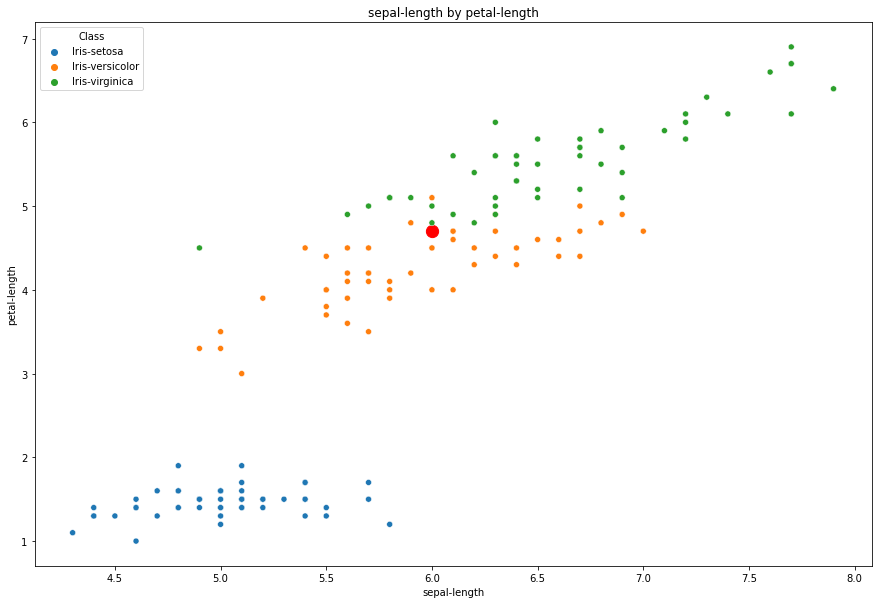

In [3]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("sepal-length by petal-length")
plt.xlabel('sepal-length')
plt.ylabel('petal-length')
plt.scatter([6], [4.7], color='red',s=150)
plt.legend()
sns.scatterplot(x='sepal-length',y='petal-length',data=dataset,hue='Class')

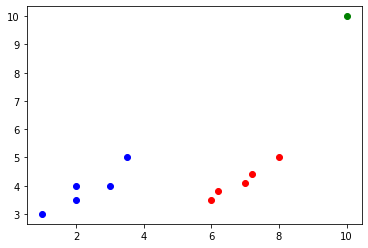

In [4]:
x1 = np.array([1,2,2, 3,3.5])
x2 = np.array([6,6.2,7, 7.2,8])
y1 = np.array([3,3.5,4,4,5])
y2 = np.array([3.5, 3.8, 4.1, 4.4, 5])

# Scatter Plot color array

plt.scatter(x1, y1, color='blue')
plt.scatter(x2, y2, color='red')
plt.scatter([10], [10], color='green')

# Display

plt.show()

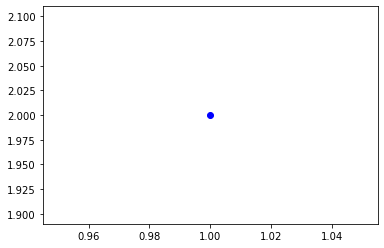

In [5]:
plt.scatter([1], [2], color='blue')

<div>
<img src="./images/knn_working.png" width="800">
</div>



In [6]:
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Steps for KNN

##### Step 1. Import the libraries(Done Above)



###### Step 2. Load the dataset(Done above)

##### Step 3. Train Test Split



In [7]:
data=dataset.copy()

In [8]:
data.columns=[x.replace("-","_") for x in data.columns]

In [9]:
data

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,train_size=0.8,random_state=3)

In [11]:
mean_train_set = train_data.mean()
mean_test_set = test_data.mean()
std_train_set = train_data.std()
std_test_set = test_data.std()

/var/folders/y0/b05q0ql9775f91gmh4wsbxf80000gn/T/ipykernel_26912/3258064851.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_train_set = train_data.mean()
/var/folders/y0/b05q0ql9775f91gmh4wsbxf80000gn/T/ipykernel_26912/3258064851.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_test_set = test_data.mean()
/var/folders/y0/b05q0ql9775f91gmh4wsbxf80000gn/T/ipykernel_26912/3258064851.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_train_set = train_data.std()
/var/

In [12]:
mean_train_set

sepal_length    5.837500
sepal_width     3.065000
petal_length    3.755833
petal_width     1.193333
dtype: float64

In [13]:
mean_test_set

sepal_length    5.866667
sepal_width     3.010000
petal_length    3.770000
petal_width     1.220000
dtype: float64

In [14]:
std_train_set

sepal_length    0.798219
sepal_width     0.428531
petal_length    1.757662
petal_width     0.760886
dtype: float64

In [15]:
std_test_set

sepal_length    0.952794
sepal_width     0.458145
petal_length    1.821547
petal_width     0.784945
dtype: float64

In [16]:
train_data.groupby('Class').mean()

,sepal_length,sepal_width,petal_length,petal_width
Class,,,,
Iris-setosa,5.0300,3.4200,1.4675,0.235
Iris-versicolor,5.9300,2.7875,4.2675,1.335
Iris-virginica,6.5525,2.9875,5.5325,2.010


In [17]:
test_class = list(test_data.iloc[:,-1])
dev_class = list(train_data.iloc[:,-1])

In [19]:
dev_class

['Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 

##### Step 4.

Define functions to compute the value of the distance metrics: Euclidean, Normalized Euclidean and Cosine Similarity¹



In [24]:
row1=dataset.iloc[0][:4]
row2=dataset.iloc[1][:4]

In [25]:
def euclideanDistance(data_1, data_2, data_len):
    dist = 0
    for i in range(data_len):
        dist = dist + np.square(data_1[i] - data_2[i])
    return np.sqrt(dist)

In [26]:
euclideanDistance(row1,row2,4)

0.5385164807134502

In [27]:


def normalizedEuclideanDistance(data_1, data_2, data_len, data_mean, data_std):
    n_dist = 0
    for i in range(data_len):
        n_dist = n_dist + (np.square(((data_1[i] - data_mean[i])/data_std[i]) - ((data_2[i] - data_mean[i])/data_std[i])))
    return np.sqrt(n_dist)

def cosineSimilarity(data_1, data_2):
    dot = np.dot(data_1, data_2[:-1])
    norm_data_1 = np.linalg.norm(data_1)
    norm_data_2 = np.linalg.norm(data_2[:-1])
    cos = dot / (norm_data_1 * norm_data_2)
    return (1-cos)


##### Define the function to return k-Nearest Neighbors²



In [28]:
row1.shape

(4,)

In [29]:
def knn(dataset, testInstance, k, dist_method, dataset_mean, dataset_std): 
    # Dictionary to store Distances of each instance from training data
    distances = {}
    
    length = testInstance.shape[1]
    if dist_method == 'euclidean':
        for x in range(len(dataset)):
            dist_up = euclideanDistance(testInstance, dataset.iloc[x], length)
            distances[x] = dist_up[0]
    elif dist_method == 'normalized_euclidean':
        for x in range(len(dataset)):
            dist_up = normalizedEuclideanDistance(testInstance, dataset.iloc[x], length, dataset_mean, dataset_std)
            distances[x] = dist_up[0]
    elif dist_method == 'cosine':
        for x in range(len(dataset)):
            dist_up = cosineSimilarity(testInstance, dataset.iloc[x])
            distances[x] = dist_up[0]
    # Sort values based on distance
    sort_distances = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    # Extracting nearest k neighbors
    for x in range(k):
        neighbors.append(sort_distances[x][0])
    # Initializing counts for 'class' labels counts as 0
    counts = {"Iris-setosa" : 0, "Iris-versicolor" : 0, "Iris-virginica" : 0}
    # Computing the most frequent class
    for x in range(len(neighbors)):
        response = dataset.iloc[neighbors[x]][-1] 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
    # Sorting the class in reverse order to get the most frequest class
    sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return(sort_counts[0][0])

##### Step 5.

Using the train dataset, iterate over all of the development data instances and compute the class for each k value and each distance metric.



In [31]:
import operator

In [34]:
# Creating a list of list of all columns except 'class' by iterating through the development set
row_list = []
for index, rows in train_data.iterrows():
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list.append([my_list])
# k values for the number of neighbors that need to be considered
k_n = [1, 3, 5, 7]
# Distance metrics
distance_methods = ['euclidean', 'normalized_euclidean', 'cosine']
# Performing kNN on the development set by iterating all of the development set data points and for each k and each distance metric
obs_k = {}
for dist_method in distance_methods:
    development_set_obs_k = {}
    for k in k_n:
        development_set_obs = []
        for i in range(len(row_list)):
            development_set_obs.append(knn(train_data, pd.DataFrame(row_list[i]), k, dist_method, mean_train_set, std_train_set))
        development_set_obs_k[k] = development_set_obs
    # Nested Dictionary containing the observed class for each k and each distance metric (obs_k of the form obs_k[dist_method][k])
    obs_k[dist_method] = development_set_obs_k
#print(obs_k)


##### Compute the accuracy for the development set



In [35]:
# Calculating the accuracy of the development set by comparing it with the development set 'class' list created earlier
accuracy = {}
for key in obs_k.keys():
    accuracy[key] = {}
    for k_value in obs_k[key].keys():
        #print('k = ', key)
        count = 0
        for i,j in zip(dev_class, obs_k[key][k_value]):
            if i == j:
                count = count + 1
            else:
                pass
        accuracy[key][k_value] = count/(len(dev_class))

# Storing the accuracy for each k and each distance metric into a dataframe
df_res = pd.DataFrame({'k': k_n})
for key in accuracy.keys():
    value = list(accuracy[key].values())
    df_res[key] = value
print(df_res)

   k  euclidean  normalized_euclidean    cosine
0  1   1.000000              1.000000  1.000000
1  3   0.966667              0.958333  0.983333
2  5   0.966667              0.958333  0.983333
3  7   0.975000              0.950000  0.991667


##### Plot a bar chart to compare the performance of hyperparameters.



[Text(0, 0.5, 'Accuracy')]

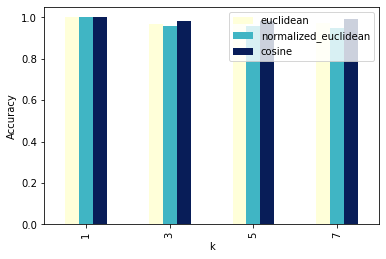

In [36]:
# Plotting a Bar Chart for accuracy
draw = df_res.plot(x='k', y=['euclidean', 'normalized_euclidean', 'cosine'], kind="bar", colormap='YlGnBu')
draw.set(ylabel='Accuracy')


##### Find the optimal hyperparameters.



In [39]:
df_res[column_val].max().idxmax()

'euclidean'

In [40]:
# In case the accuracy is the same for different k and different distance metric selecting the first of all the same
column_val = [c for c in df_res.columns if not c.startswith('k')]
col_max = df_res[column_val].max().idxmax()
best_dist_method = col_max
row_max = df_res[col_max].argmax()
best_k = int(df_res.iloc[row_max]['k'])
if df_res.isnull().values.any():
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m. Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting')
else:
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m.')




Best k value is 1 and best distance metric is euclidean .


##### Step 7.



In [43]:
# Creating a list of list of all columns except 'class' by iterating through the development set
row_list_test = []
for index, rows in test_data.iterrows(): 
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list_test.append([my_list])
test_set_obs = []
for i in range(len(row_list_test)):
    test_set_obs.append(knn(test_data, pd.DataFrame(row_list_test[i]), best_k, best_dist_method, mean_test_set, std_test_set))
#print(test_set_obs)

count = 0
for i,j in zip(test_class, test_set_obs):
    if i == j:
        count = count + 1
    else:
        pass
accuracy_test = count/(len(test_class))
print('Final Accuracy of the Test dataset is ', accuracy_test)

Final Accuracy of the Test dataset is  1.0
